<a href="https://colab.research.google.com/github/Balisa50/restaurant-data-analysis/blob/main/Another_copy_of_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import liberies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read and print the dataset
link ="https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv"
df = pd.read_csv(link)
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


 # Understanding the data

In [ ]:

# checking shape (# of rows and columns)
df.shape

(9551, 21)

In [ ]:
# details about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:

# for numerical coulmns
pd.set_option('display.float_format', '{:.3f}'.format) # formatting to 3 dp
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.000,9051128.349,8791521.282,53.000,301962.500,6004089.000,18352291.500,18500652.000
Country Code,9551.000,18.366,56.751,1.000,1.000,1.000,1.000,216.000
Longitude,9551.000,64.127,41.467,-157.948,77.081,77.192,77.282,174.832
Latitude,9551.000,25.854,11.008,-41.330,28.479,28.570,28.643,55.977
Average Cost for two,9551.000,1199.211,16121.183,0.000,250.000,400.000,700.000,800000.000
Price range,9551.000,1.805,0.906,1.000,1.000,2.000,2.000,4.000
Aggregate rating,9551.000,2.666,1.516,0.000,2.500,3.200,3.700,4.900
Votes,9551.000,156.910,430.169,0.000,5.000,31.000,131.000,10934.000


In [ ]:
# for categorical coulmns
df.describe(include=['object']).T

,count,unique,top,freq
Restaurant Name,9551,7446,Cafe Coffee Day,83
City,9551,141,New Delhi,5473
Address,9551,8918,"Dilli Haat, INA, New Delhi",11
Locality,9551,1208,Connaught Place,122
Locality Verbose,9551,1265,"Connaught Place, New Delhi",122
Cuisines,9542,1825,North Indian,936
Currency,9551,12,Indian Rupees(Rs.),8652
Has Table booking,9551,2,No,8393
Has Online delivery,9551,2,No,7100
Is delivering now,9551,2,No,9517


In [ ]:
# checking for missing values in each columns and sorting them
df.isna().sum().sort_values(ascending = False)

,0
Cuisines,9
Restaurant ID,0
Currency,0
Rating text,0
Rating color,0
Aggregate rating,0
Price range,0
Switch to order menu,0
Is delivering now,0
Has Online delivery,0


In [ ]:

# finding the total missing values
df.isna().sum().sum()

9

In [ ]:

# checking duplicates
df.duplicated().sum()

0

In [ ]:
# most freq cuisine
df['Cuisines'].mode()[0]

'North Indian'

In [ ]:

df[['Cuisines', 'City']].isnull().sum()

,0
Cuisines,9
City,0


In [ ]:
# filling the missing value spot with the mode
df["Cuisines"].fillna(df['Cuisines'].mode()[0], inplace=True)

<ipython-input-37-e300f3483ac6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cuisines"].fillna(df['Cuisines'].mode()[0], inplace=True)


In [ ]:
df.isna().sum().sum()

0

In [ ]:
# numerical columns
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [ ]:
# categorical columns
cat_cols = df.select_dtypes(['object', 'category']).columns
cat_cols

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

In [ ]:


# top 10  cuisines
top_cuisines = df['Cuisines'].str.split(',').explode().str.strip().value_counts().head(10) # I separated the values
top_cuisines
# top 10  cities
top_city = df['City'].value_counts().head(10)
top_city

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
Bhubaneshwar,21
Amritsar,21
Ahmedabad,21
Lucknow,21


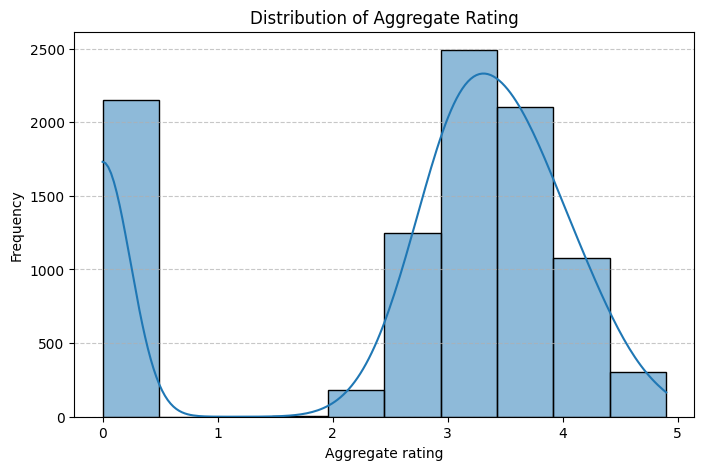


Aggregate Rating Distribution:
Aggregate rating
0.000    2148
1.800       1
1.900       2
2.000       7
2.100      15
2.200      27
2.300      47
2.400      87
2.500     110
2.600     191
2.700     250
2.800     315
2.900     381
3.000     468
3.100     519
3.200     522
3.300     483
3.400     498
3.500     480
3.600     458
3.700     427
3.800     400
3.900     335
4.000     266
4.100     274
4.200     221
4.300     174
4.400     144
4.500      95
4.600      78
4.700      42
4.800      25
4.900      61
Name: count, dtype: int64


In [ ]:
# Analyzing Aggregate Rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Aggregate rating"], bins=10, kde=True)
plt.xlabel("Aggregate rating")
plt.ylabel("Frequency")
plt.title("Distribution of Aggregate Rating")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Checking value counts to analyze class imbalance
rating_distribution = df["Aggregate rating"].value_counts().sort_index()
print("\nAggregate Rating Distribution:")
print(rating_distribution)


In [ ]:
# top 10  cities
top_city = df['City'].value_counts().head(10)
top_city

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
Bhubaneshwar,21
Amritsar,21
Ahmedabad,21
Lucknow,21


In [ ]:
#checking for skewness and inbalance for numerical columns
# before applying the sqrt
for col in num_cols:
    skewness = df[col].skew()
    print(f'{col} \n Skew = {skewness}')

Restaurant ID 
 Skew = 0.061569976479250714
Country Code 
 Skew = 3.043965346403779
Longitude 
 Skew = -2.8073278338140857
Latitude 
 Skew = -3.08163535060857
Average Cost for two 
 Skew = 35.477914900871276
Price range 
 Skew = 0.8896175931442
Aggregate rating 
 Skew = -0.9541304733200109
Votes 
 Skew = 8.807636687709472


In [ ]:
# applying the sqrt
df = df[num_cols].apply(np.sqrt)
for col in num_cols:
    skewness = df[col].skew()
    print(f'{col} \n Skew = {skewness}')

Restaurant ID 
 Skew = -0.04447115340657841
Country Code 
 Skew = 2.960356535483066
Longitude 
 Skew = -3.4414938224093645
Latitude 
 Skew = -3.2881814527542654
Average Cost for two 
 Skew = 19.649105873942954
Price range 
 Skew = 0.584859433949503
Aggregate rating 
 Skew = -1.2180856619500915
Votes 
 Skew = 2.518921597172645


# *Key Inferences*
### The dataset has 9551 columns and 21 rows
### its has 9 missing values, all from cuisine (which i replaced with the mode of the column)
### There are 8 numerical columns and 13 categorical columns
### All columns are in a correct data type (no need for converion)
### For the descriptive statistics for the numerical columns, columns "Average cost for two" has a huge discrepency, it has a min of 0 and 800k which suspicious
### There are no duplicated values
### For the descriptive statistics for the categorical columns,(count,    unique ,    top , freq)
### For the "Cuisines" column, there is a problem of some cuisines not been separted and are counted as 1, which is a properly in our analysis
### I corrected the blunder by using the ".str.split(',').explode().str.strip()", and then count the top 10 and the top then cities
### For the skewness and outlier detections; Variables like Country Code, Average Cost for Two, and Votes have a strong positive skew, meaning a small number of values are much larger than the rest.
### Latitude and Longitude have a strong negative skew, suggesting a concentration of data points in certain locations.
### Aggregate Rating and Price Range have mild skewness, indicating slight asymmetry but not extreme.
### Restaurant ID is nearly symmetrical.
### For the outliers i decided to use sqrt to minimise there effect, idk whether to remove them or not. i applied on the numerical columns
## want to hear your views

# **Week 2: Data Visualization**

Create histograms,
bar plots, and box
plots of ratings.
Compare average *italicized text*
ratings across
cuisines and cities.

 Map restaurant
locations using
coordinates.
Analyze distribution
across cities.
Correlate location
with ratings

 Identify outliers and
their effects.
Determine
relationship
between votes and
ratings.
**bold text**

Create histograms,
bar plots, and box
plots of ratings.
Compare average
ratings across
cuisines and cities.

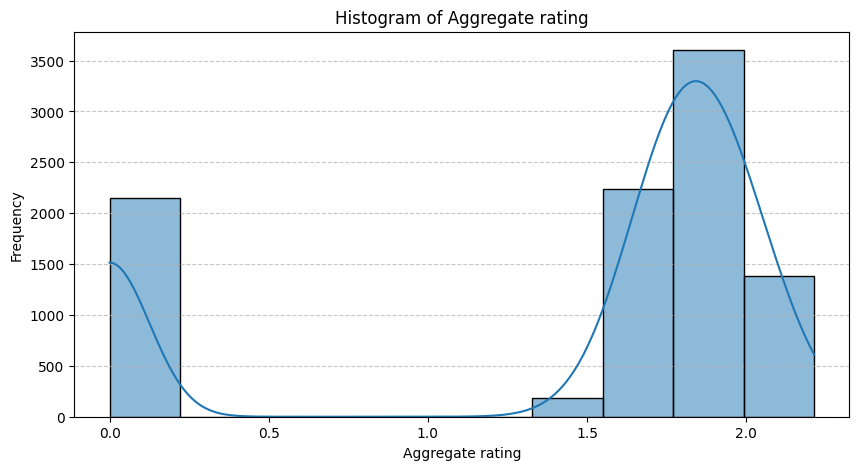

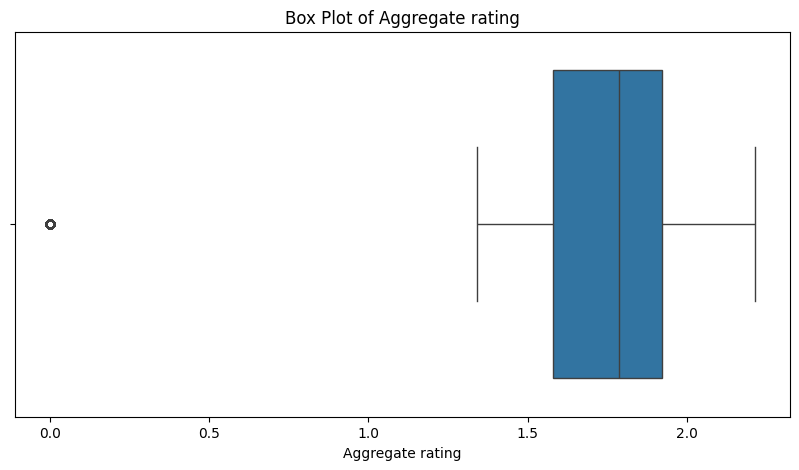

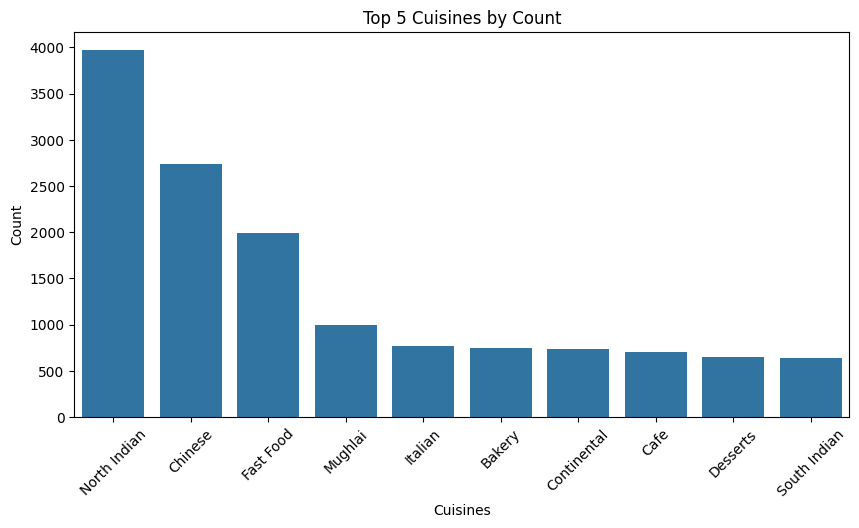

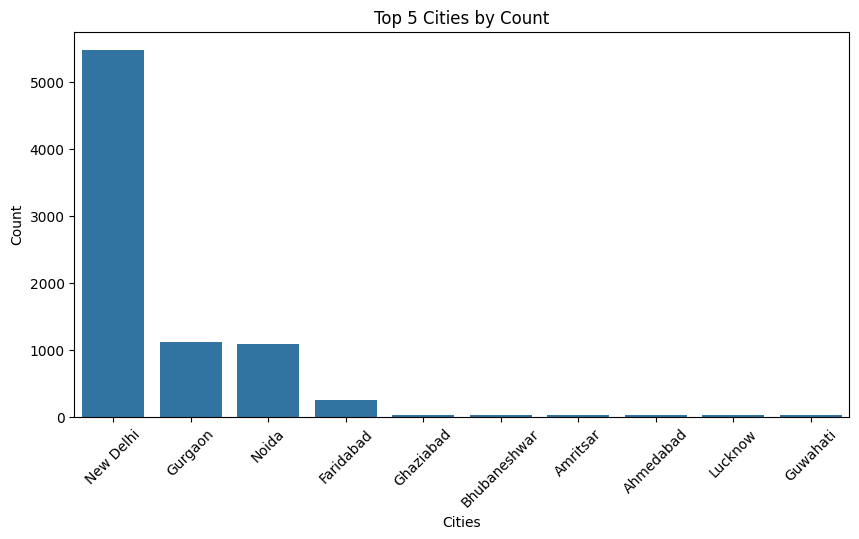

In [ ]:
# Creating histograms, bar plots, and box plots of ratings
plt.figure(figsize=(10, 5))
sns.histplot(df["Aggregate rating"], bins=10, kde=True)
plt.xlabel("Aggregate rating")
plt.ylabel("Frequency")
plt.title("Histogram of Aggregate rating")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Aggregate rating"])
plt.xlabel("Aggregate rating")
plt.title("Box Plot of Aggregate rating")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cuisines.index, y=top_cuisines.values)
plt.xlabel("Cuisines")
plt.ylabel("Count")
plt.title("Top 5 Cuisines by Count")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=top_city.index, y=top_city.values)
plt.xlabel("Cities")
plt.ylabel("Count")
plt.title("Top 5 Cities by Count")
plt.xticks(rotation=45)
plt.show()




In [ ]:
df.columns

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [ ]:
print(df.columns)

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes',
       'geometry'],
      dtype='object')


In [ ]:
print(df.dtypes)


Restaurant ID           float64
Country Code            float64
Longitude               float64
Latitude                float64
Average Cost for two    float64
Price range             float64
Aggregate rating        float64
Votes                   float64
geometry                 object
dtype: object


In [ ]:
# Comparing average ratings across cuisines and cities
avg_rating_cuisines = df.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Cuisines by Average Rating:")
print(avg_rating_cuisines)



Top 10 Cuisines by Average Rating:
Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Italian, Bakery, Continental       4.9
BBQ, Breakfast, Southern           4.9
European, German                   4.9
Hawaiian, Seafood                  4.9
Sunda, Indonesian                  4.9
Name: Aggregate rating, dtype: float64


In [ ]:
avg_rating_cities = df.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Cities by Average Rating:")
print(avg_rating_cities)



Top 10 Cities by Average Rating:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Secunderabad        4.500000
Lincoln             4.500000
Name: Aggregate rating, dtype: float64


## ***Geospatial Analysis***

Map restaurant
locations using
coordinates.

Analyze distribution
across cities.
Correlate location
with ratings




Map restaurant locations using coordinates. Analyze distribution across cities. Correlate location with ratings

In [ ]:
!pip install geopandas shapely

In [ ]:
import pandas as pd
import geopandas as gpd
import folium
import zipfile
import os
from shapely.geometry import Point
from google.colab import files

# Map Restaurants by Rating


#  Upload ZIP file

uploaded = files.upload()
for filename in uploaded:
    if filename.endswith(".zip"):
        with zipfile.ZipFile(filename, "r") as zip_ref:
            zip_ref.extractall("shapefile_data")
        print(f"Unzipped {filename} into 'shapefile_data' folder.")
        break

# Check if data got Longitude, Latitude, and Rating
if not {"Longitude", "Latitude", "Aggregate rating"}.issubset(df.columns):
    print("Error: Dataset missing important column (Longitude, Latitude, or Rating).")
else:
    #  Convert to map points
    df["geometry"] = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
    gdf = gpd.GeoDataFrame(df, geometry="geometry")

    #  Find the .shp file in the folder
    shapefile_path = None
    for file in os.listdir("shapefile_data"):
        if file.endswith(".shp"):
            shapefile_path = os.path.join("shapefile_data", file)
            break

    if shapefile_path:
        try:
            #  Load the map (shapefile)
            world = gpd.read_file(shapefile_path)
        except FileNotFoundError:
            print("Error: Shapefile not found, maybe check ZIP file?")
        except ValueError:
            print("Error: Can’t read shapefile, something wrong.")
        else:
            #  Make map, focus on restaurant area
            center_lat, center_lon = gdf["Latitude"].mean(), gdf["Longitude"].mean()
            my_map = folium.Map(location=[center_lat, center_lon], zoom_start=4, tiles="CartoDB positron")

            # Add country shape to map
            folium.GeoJson(
                world,
                style_function=lambda x: {
                    "fillColor": "lightblue",
                    "color": "black",
                    "weight": 0.5,
                    "fillOpacity": 0.4,
                },
            ).add_to(my_map)

            #  Function to set marker color based on rating
            def get_color(rating):
                if rating >= 4.5:
                    return "green"  # Very good
                elif 3.0 <= rating < 4.5:
                    return "yellow"  # Okay
                else:
                    return "red"  # Not good

            #  Add restaurants to map
            for _, row in gdf.iterrows():
                name = row.get("Restaurant Name", row.get("Restaurant", "Unknown"))
                rating = row.get("Aggregate rating", 0)  # If no rating, assume 0
                color = get_color(rating)

                folium.CircleMarker(
                    location=[row["Latitude"], row["Longitude"]],
                    radius=5,
                    color=color,
                    fill=True,
                    fill_color=color,
                    fill_opacity=0.7,
                    popup=f"Restaurant: {name}<br>Rating: {rating}",
                ).add_to(my_map)

            #  Show map
            display(my_map)

            # Find correlation (does location affect rating?)
            correlation = df[["Longitude", "Latitude", "Aggregate rating"]].corr()
            print("Correlation Matrix:\n", correlation)

    else:
        print("No .shp file found in the folder. Try again?")



MAP analysis and inferences

I separated them using colors, using three categories showing the strength of the Aggregate rating,if rating >= 4.5:
                    return "green" ,Very good
                elif 3.0 <= rating < 4.5:
                    return "yellow" , Okay
                else:
                    return "red"  , Not good.

Many of the resturants are found in india and few are in africa.

They have a very correlation, latitude, longitude and Aggregate ratng


### ***Additional Analysis***
Identify outliers and
their effects.

Determine
relationship
between votes and
ratings.

Identify outliers and their effects. Determine relationship between votes and ratings.

In [ ]:
# Checking summary statistics
print(df[['Votes', 'Aggregate rating']].describe())

# Boxplot to visualize outliers
plt.figure(figsize=(9,6))
sns.boxplot(data=df[['Votes', 'Aggregate rating']])
plt.title("Boxplot of Votes and Ratings (Detecting Outliers)")
plt.show()

# IQR Method to Identify Outliers
Q1 = df[['Votes', 'Aggregate rating']].quantile(0.25)
Q3 = df[['Votes', 'Aggregate rating']].quantile(0.75)
IQR = Q3 - Q1

outliers = df[((df[['Votes', 'Aggregate rating']] < (Q1 - 1.5 * IQR)) | (df[['Votes', 'Aggregate rating']] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Detected Outliers:")
print(outliers)


In [ ]:
# Boxplots to visualize outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["Aggregate rating"])
plt.title("Boxplot of Aggregate Rating")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Votes"])
plt.title("Boxplot of Votes")

plt.show()


In [ ]:
# Select numerical columns for outlier analysis
num_cols = ["Aggregate rating", "Votes"]

# Compute IQR for numerical columns
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers:\n", outliers)


### **Key Inferences**  

1. **Aggregate Rating (2,148 outliers)** → Indicates **extreme customer opinions**, suggesting highly loved or poorly rated restaurants.  

2. **Votes (1,126 outliers)** → Some restaurants receive **far more or fewer reviews**, likely due to popularity, marketing, or fake reviews.
### **Effects Based on Outlier Behavior**  

3. **Aggregate Rating Outliers** → Likely **highly concentrated at extremes** (very high or very low), indicating **polarized customer feedback**. This can distort average ratings and misrepresent overall quality.  

4. **Votes Outliers** → Likely **right-skewed**, with a few restaurants having **significantly higher votes**. This suggests **a small number of highly popular restaurants dominate reviews**, while many have minimal engagement.

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Votes"], y=df["Aggregate rating"], alpha=0.6)
plt.xlabel("Votes")
plt.ylabel("Aggregate Rating")
plt.title("Relationship Between Votes and Ratings")
plt.show()

In [ ]:
correlation = df["Votes"].corr(df["Aggregate rating"])
print(f"Correlation between Votes and Ratings: {correlation}")



**Votes & Ratings: Do they relate?**

 Correlation = 0.31 (weak positive)
 More votes kinda mean better rating, but not always.

 What this tell us:
 Some top-rated places got few votes.
 Some places with many votes still have bad ratings.
 People might not vote just based on rating.

 Why this happen?
 Small/local restaurants: Good ratings, but not many people vote.
 Popular places: Many votes, but ratings all over the place.
 Fake votes: Some places may have high votes, but rating not match.

 More votes **don’t always** mean better place. Ratings still matter most.
